In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os
from datetime import datetime

In [3]:
file_path = "T2.xlsx" 

if file_path.endswith(".xlsx"):
    df = pd.read_excel(file_path)
else:
    df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(f"Shape: {df.shape}\n")

Data loaded successfully!
Shape: (100, 52)



In [4]:
df.head(10)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,...,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1
6,1HRFFHEL4RZ149960,13071,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212922CKJX0928,2809208122,24,1,Y,TF10543,1500,10.0,0,1
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,Special Order Part [ steering wheel heated ste...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1212982CKJX2188,2808882287,4,1,N,CF10543,1500,15.0,0,1
8,1HRF9CED6NZ221061,13021,TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...,CUSTOMER STATES STEERING WHEEL IS MAKING A RUB...,2024-01-08,NaN,Steering Wheel Spoke Cover Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2220422XKJX0272,2808998129,2,1,N,TF18543,1500,16.0,0,1
9,1HRFFHEL8RZ133325,13074,Steering Wheel Replacement,Customer states that they are getting a messag...,2024-01-09,WHEEL ASM-STRG *VERY DARK AT,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212112CKJX2084,2821988724,4,1,Y,TF10543,1500,10.0,1,1


In [ ]:
summary = []
for c in df.columns:
    dtype = df[c].dtype
    nunique = df[c].nunique(dropna=True)
    missing = df[c].isna().sum()
    sample_vals = df[c].dropna().unique()[:5]
    summary.append([c, dtype, nunique, missing, sample_vals])

col_summary = pd.DataFrame(summary, columns=["Column", "Type", "Unique_Values", "Missing_Count", "Sample_Values"])
print(" COLUMN-WISE SUMMARY ")
print(col_summary.head(10))

===== COLUMN-WISE SUMMARY =====
                          Column            Type  Unique_Values  \
0                            VIN          object             98   
1                 TRANSACTION_ID           int64             32   
2            CORRECTION_VERBATIM          object             93   
3              CUSTOMER_VERBATIM          object            100   
4                    REPAIR_DATE  datetime64[ns]             29   
5                 CAUSAL_PART_NM          object             18   
6  GLOBAL_LABOR_CODE_DESCRIPTION          object              4   
7                       PLATFORM          object             11   
8                     BODY_STYLE          object              6   
9                           VPPC          object             26   

   Missing_Count                                      Sample_Values  
0              0  [3HCFDDE89SH220903, 1HRFFEE8XSZ230636, 1HYKSMR...  
1              0                [13021, 13028, 13035, 13026, 13071]  
2              0  [R

In [ ]:
df_clean = df.copy()

for c in df_clean.select_dtypes(include=['object']).columns:
    df_clean[c] = df_clean[c].astype(str).str.strip().str.lower().replace({'nan': np.nan})

if 'REPAIR_DATE' in df_clean.columns:
    df_clean['REPAIR_DATE'] = pd.to_datetime(df_clean['REPAIR_DATE'], errors='coerce')

num_cols = ['KM', 'TOTALCOST', 'REPORTING_COST', 'LBRCOST', 'NON_CAUSAL_PART_QTY']
for c in num_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

for c in df_clean.columns:
    if df_clean[c].dtype in ['float64', 'int64']:
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())
    else:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0] if not df_clean[c].mode().empty else "unknown")

for c in num_cols:
    if c in df_clean.columns:
        low, high = df_clean[c].quantile(0.01), df_clean[c].quantile(0.99)
        df_clean[c] = df_clean[c].clip(lower=low, upper=high)

print("\nData cleaning complete!\n")


Data cleaning complete!



In [7]:
df.head(10)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,...,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1
6,1HRFFHEL4RZ149960,13071,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212922CKJX0928,2809208122,24,1,Y,TF10543,1500,10.0,0,1
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,Special Order Part [ steering wheel heated ste...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1212982CKJX2188,2808882287,4,1,N,CF10543,1500,15.0,0,1
8,1HRF9CED6NZ221061,13021,TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...,CUSTOMER STATES STEERING WHEEL IS MAKING A RUB...,2024-01-08,NaN,Steering Wheel Spoke Cover Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2220422XKJX0272,2808998129,2,1,N,TF18543,1500,16.0,0,1
9,1HRFFHEL8RZ133325,13074,Steering Wheel Replacement,Customer states that they are getting a messag...,2024-01-09,WHEEL ASM-STRG *VERY DARK AT,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212112CKJX2084,2821988724,4,1,Y,TF10543,1500,10.0,1,1


Top 5 Critical Columns: ['PLATFORM', 'COMPLAINT_CD', 'REPAIR_DATE', 'DEALER_REGION', 'CAUSAL_PART_NM']



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

Charts generated and saved as PNG files.



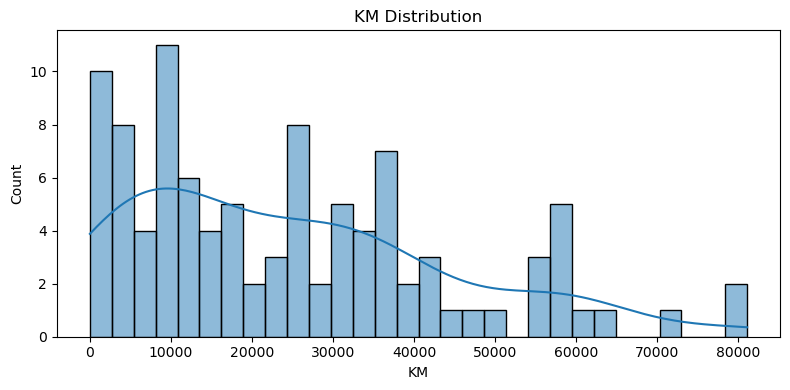

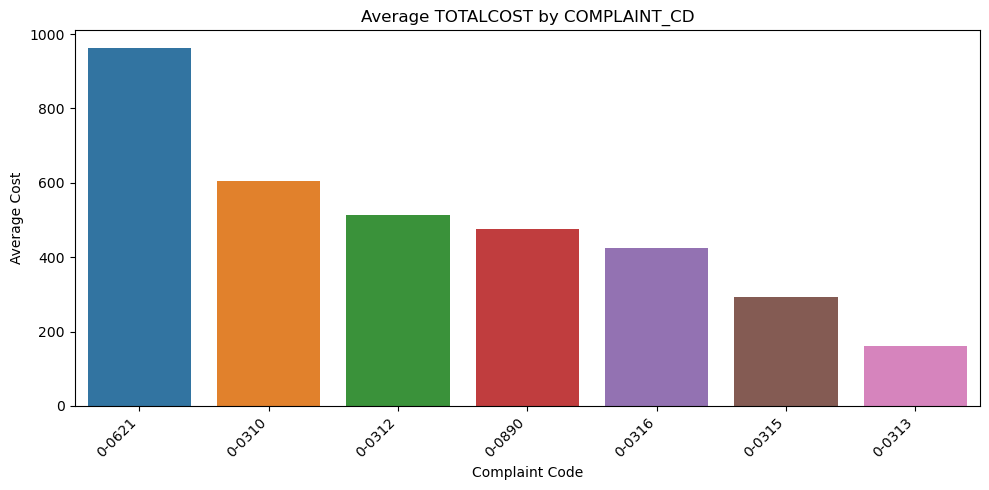

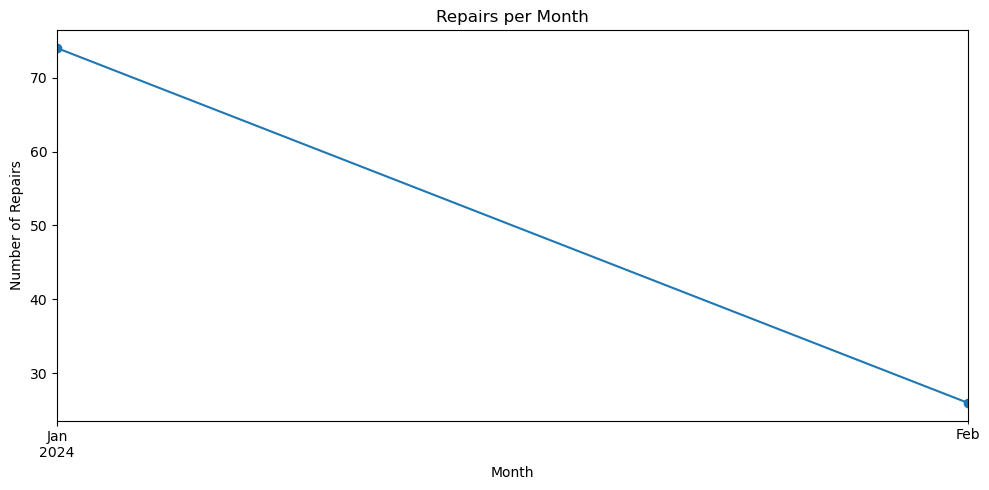

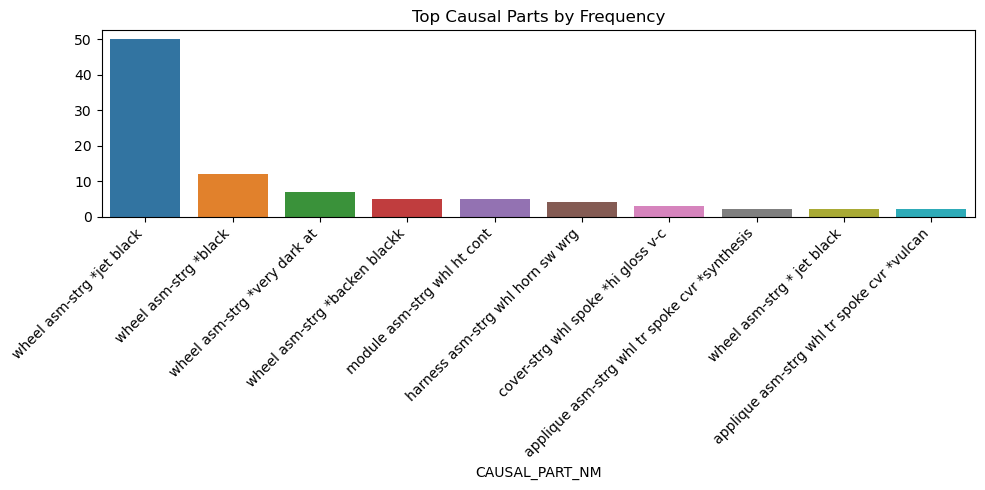

In [ ]:
critical_columns = ['PLATFORM', 'COMPLAINT_CD', 'REPAIR_DATE', 'DEALER_REGION', 'CAUSAL_PART_NM']
print(f"Top 5 Critical Columns: {critical_columns}\n")

if 'KM' in df_clean.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean['KM'], bins=30, kde=True)
    plt.title("KM Distribution")
    plt.xlabel("KM"); plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("km_distribution.png")


if 'COMPLAINT_CD' in df_clean.columns and 'TOTALCOST' in df_clean.columns:
    plt.figure(figsize=(10, 5))
    top_cost = df_clean.groupby('COMPLAINT_CD')['TOTALCOST'].mean().nlargest(10)
    sns.barplot(x=top_cost.index, y=top_cost.values)
    plt.title("Average TOTALCOST by COMPLAINT_CD")
    plt.xlabel("Complaint Code"); plt.ylabel("Average Cost")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("totalcost_by_complaint.png")


if 'REPAIR_DATE' in df_clean.columns:
    plt.figure(figsize=(10, 5))
    df_clean['Month'] = df_clean['REPAIR_DATE'].dt.to_period('M')
    repairs = df_clean.groupby('Month').size()
    repairs.plot(marker='o')
    plt.title("Repairs per Month")
    plt.xlabel("Month"); plt.ylabel("Number of Repairs")
    plt.tight_layout()
    plt.savefig("repairs_per_month.png")

if 'CAUSAL_PART_NM' in df_clean.columns:
    plt.figure(figsize=(10, 5))
    top_parts = df_clean['CAUSAL_PART_NM'].value_counts().head(10)
    sns.barplot(x=top_parts.index, y=top_parts.values)
    plt.title("Top Causal Parts by Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("top_causal_parts.png")

print("Charts generated and saved as PNG files.\n")


In [ ]:
def generate_tags(text):
    if pd.isna(text): 
        return np.nan
    text_lower = text.lower()  
    tags = []
    if "engine" in text_lower: tags.append("ENGINE")
    if "leak" in text_lower: tags.append("LEAK")
    if "noise" in text_lower: tags.append("NOISE")
    if "stall" in text_lower: tags.append("STALL")
    if "brake" in text_lower: tags.append("BRAKE")
    if "battery" in text_lower: tags.append("BATTERY")
    if "injector" in text_lower: tags.append("INJECTOR")
    if "ac" in text_lower or "compressor" in text_lower: tags.append("AC")
    if "vibration" in text_lower: tags.append("VIBRATION")
    return list(set(tags)) if tags else np.nan

if 'CUSTOMER_VERBATIM' in df_clean.columns:
    df_clean['CUSTOMER_VERBATIM_TAGS'] = df_clean['CUSTOMER_VERBATIM'].apply(generate_tags)

if 'CORRECTION_VERBATIM' in df_clean.columns:
    df_clean['CORRECTION_VERBATIM_TAGS'] = df_clean['CORRECTION_VERBATIM'].apply(generate_tags)


def join_tag_list(x):
    combined = []
    for item in x:
        if isinstance(item, list):
            combined.extend(item)
    return ','.join(combined) if combined else np.nan

df_clean['TAGS'] = df_clean[['CUSTOMER_VERBATIM_TAGS', 'CORRECTION_VERBATIM_TAGS']].apply(join_tag_list, axis=1)


df_clean = df_clean.applymap(lambda x: x.upper() if isinstance(x, str) else x)


df_clean.to_csv("tagged_output.csv", index=False)
print("Tagged dataset saved as 'tagged_output.csv'\n")


Tagged dataset saved as 'tagged_output.csv' in UPPER CASE



C:\Users\sandi\AppData\Local\Temp\ipykernel_14632\563423351.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [10]:
df.head(10)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
5,3HRFFHED7RH167541,13026,Remove and replace steering wheel wire harness,Horn and steering wheel switches are inoperable,2024-01-05,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,Full-Size Trucks,Crew Cab,T1CGF,...,S2212992CKJX2842,2809498122,6,1,N,TF10543,1500,16.0,0,1
6,1HRFFHEL4RZ149960,13071,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...",CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212922CKJX0928,2809208122,24,1,Y,TF10543,1500,10.0,0,1
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,Special Order Part [ steering wheel heated ste...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1212982CKJX2188,2808882287,4,1,N,CF10543,1500,15.0,0,1
8,1HRF9CED6NZ221061,13021,TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...,CUSTOMER STATES STEERING WHEEL IS MAKING A RUB...,2024-01-08,NaN,Steering Wheel Spoke Cover Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2220422XKJX0272,2808998129,2,1,N,TF18543,1500,16.0,0,1
9,1HRFFHEL8RZ133325,13074,Steering Wheel Replacement,Customer states that they are getting a messag...,2024-01-09,WHEEL ASM-STRG *VERY DARK AT,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212112CKJX2084,2821988724,4,1,Y,TF10543,1500,10.0,1,1
